# Data exploration

In [41]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)


In [42]:
raw = pd.read_csv('Hotel_Reviews.csv')
raw.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

Filter out those that either did not input negative, or positive review - only these that input both.

In [43]:
raw[(raw['Negative_Review']=='No Negative')|(raw['Positive_Review']=='No Positive')].head()

Hotel_Address  \
1    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
8    s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
13   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
15   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
18   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

    Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
1                            194    8/3/2017            7.7  Hotel Arena   
8                            194    7/9/2017            7.7  Hotel Arena   
13                           194    7/4/2017            7.7  Hotel Arena   
15                           194    7/3/2017            7.7  Hotel Arena   
18                           194   6/29/2017            7.7  Hotel Arena   

   Reviewer_Nationality                                    Negative_Review  \
1              Ireland                                         No Negative   
8              Belgium    Even though the pictures show very clean room...   
13               Italy                                         No Negative   
15               Italy                                         No Negative   
18         Netherlands                                         No Negative   

    Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
1                                   0                     1403   
8                                  34                     1403   
13                                  0                     1403   
15                                  0                     1403   
18                                  0                     1403   

                                      Positive_Review  \
1    No real complaints the hotel was great great ...   
8                                         No Positive   
13   This hotel is being renovated with great care...   
15   This hotel is awesome I took it sincirely bec...   
18   Public areas are lovely and the room was nice...   

    Review_Total_Positive_Word_Counts  \
1                                 105   
8                                   0   
13                                 59   
15                                 82   
18                                 33   

    Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
1                                            7             7.5   
8                                            3             6.5   
13                                           6             9.2   
15                                          26            10.0   
18                                           4             7.1   

                                                 Tags days_since_review  \
1   [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
8   [' Leisure trip ', ' Couple ', ' Duplex Double...           25 days   
13  [' Business trip ', ' Solo traveler ', ' Duple...           30 days   
15  [' Leisure trip ', ' Couple ', ' Duplex Double...           31 days   
18  [' Business trip ', ' Group ', ' Duplex Double...           35 days   

          lat       lng  
1   52.360576  4.915968  
8   52.360576  4.915968  
13  52.360576  4.915968  
15  52.360576  4.915968  
18  52.360576  4.915968

In [44]:
raw['Reviewer_Nationality'].nunique()

227

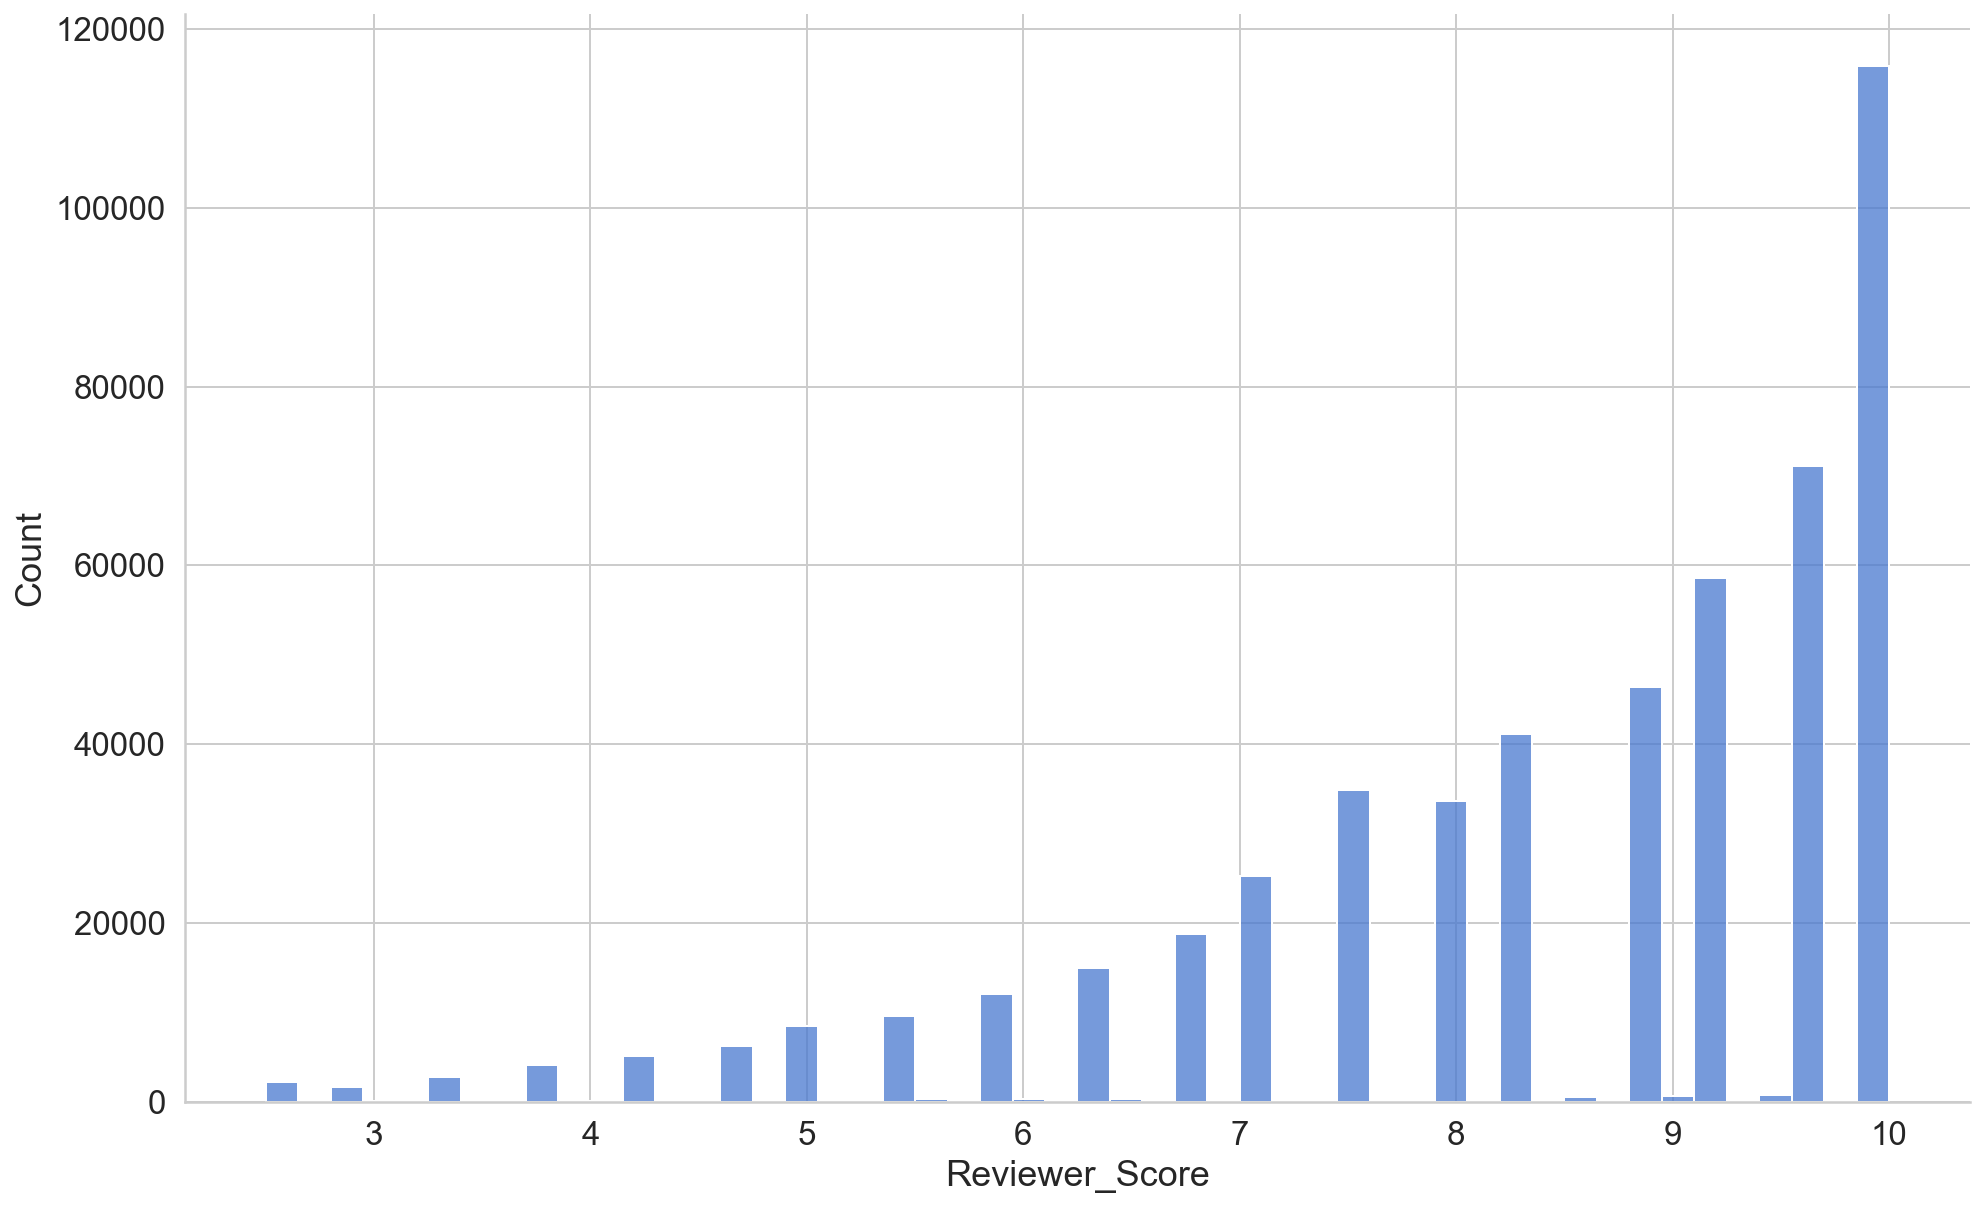

In [45]:
sns.histplot(data = raw['Reviewer_Score'], bins = 50)
sns.despine();

### Explorace počtů values v jednotlivých sloupích pro jednotlivé "ranges" hodnocení

In [9]:
print(raw[(raw['Reviewer_Score'] < 6)].count())
print(raw[(raw['Reviewer_Score'] >= 6) & (raw['Reviewer_Score'] < 8)].count())
print(raw[(raw['Reviewer_Score'] >= 8)].count())


891957
Hotel_Address                                 127585
Additional_Number_of_Scoring                  127585
Review_Date                                   127585
Average_Score                                 127585
Hotel_Name                                    127585
Reviewer_Nationality                          127585
Negative_Review                               127585
Review_Total_Negative_Word_Counts             127585
Total_Number_of_Reviews                       127585
Positive_Review                               127585
Review_Total_Positive_Word_Counts             127585
Total_Number_of_Reviews_Reviewer_Has_Given    127585
Reviewer_Score                                127585
Tags                                          127585
days_since_review                             127585
lat                                           126730
lng                                           126730
dtype: int64
Hotel_Address                                 335646
Additional_Number_of_Scori

In [46]:
df = raw.copy()

### Getting city names

Some hotels and/or addresses are named after cities.

In [47]:
### adding cities
link = "https://en.wikipedia.org/wiki/Largest_capital_cities_of_the_European_Union"
link2 = 'https://en.wikipedia.org/wiki/List_of_European_cities_by_population_within_city_limits'

table2 = pd.read_html(link2)[0]
table = pd.read_html(link)[0]
table2 = table2['City']
table = table['City']

table2 = table2.replace(r"\[.*\]","", regex = True)
cities_to_append = pd.Series(['London', 'Barcelona', 'Oslo', 'Helsinki', 'Athens'])

tab = table.append([table2, cities_to_append], ignore_index = True)

def get_city(string):
    string_short = string.split(' ')[-5:]
    for city in tab:
        if city in (string_short):
            return city

df['City'] = df['Hotel_Address'].apply(get_city)

In [48]:
df['City'].value_counts()

London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: City, dtype: int64

In [49]:
df = df[(df['Negative_Review']!='No Negative')&(df['Positive_Review']!='No Positive')&(df['Reviewer_Score']>=8)]

In [50]:
len(df)

210130

### Concatenate reviews into one.

In [51]:
df['merged_review_text'] = df['Negative_Review']+df['Positive_Review']

In [53]:
df_sampled = df.sample(n=10000, random_state = 1)
len(df_sampled)

10000

In [54]:
df = df_sampled[['Hotel_Address','City','merged_review_text','Reviewer_Score']]

In [55]:
df.reset_index(inplace=True)

In [56]:
df.head()

index                                      Hotel_Address       City  \
0  236214  7 Pepys Street City of London London EC3N 4AF ...     London   
1   19710  10 Godliman Street City of London London EC4V ...     London   
2  120294  24 Ludgate Hill City of London London EC4M 7DR...     London   
3  480852  Via Lucio Giunio Columella 36 Distretto Viale ...      Milan   
4  297890           Caspe 103 Eixample 08013 Barcelona Spain  Barcelona   

                                  merged_review_text  Reviewer_Score  
0   Tv was a bit small and sound couldn t be turn...             9.2  
1   Breakfast to be included in the price Locatio...             8.3  
2   Mattress was a little hard but clean  Excelle...             9.6  
3   Everything was great  Location room bathroom ...            10.0  
4   We had a nicer room assigned but the bed had ...             8.8

In [57]:
df = df[['Hotel_Address','City', 'merged_review_text', 'Reviewer_Score']]

In [58]:
df.head()

Hotel_Address       City  \
0  7 Pepys Street City of London London EC3N 4AF ...     London   
1  10 Godliman Street City of London London EC4V ...     London   
2  24 Ludgate Hill City of London London EC4M 7DR...     London   
3  Via Lucio Giunio Columella 36 Distretto Viale ...      Milan   
4           Caspe 103 Eixample 08013 Barcelona Spain  Barcelona   

                                  merged_review_text  Reviewer_Score  
0   Tv was a bit small and sound couldn t be turn...             9.2  
1   Breakfast to be included in the price Locatio...             8.3  
2   Mattress was a little hard but clean  Excelle...             9.6  
3   Everything was great  Location room bathroom ...            10.0  
4   We had a nicer room assigned but the bed had ...             8.8

### Randomly view some addresses and cities to check

In [59]:
for i in [1,12,34,576,3245,234,1234,4567,123,1246,9786,7654,6543]:
    print(df.iloc[i][['Hotel_Address','City']])

Hotel_Address    10 Godliman Street City of London London EC4V ...
City                                                        London
Name: 1, dtype: object
Hotel_Address    Gudrunstra e 184 10 Favoriten 1100 Vienna Austria
City                                                        Vienna
Name: 12, dtype: object
Hotel_Address    92 Southampton Row Camden London WC1B 4BH Unit...
City                                                        London
Name: 34, dtype: object
Hotel_Address    52 54 Upper Richmond Road Wandsworth London SW...
City                                                        London
Name: 576, dtype: object
Hotel_Address    335 337 High Street Stratford Newham London E1...
City                                                        London
Name: 3245, dtype: object
Hotel_Address    30 Rue de Bassano 16th arr 75016 Paris France
City                                                     Paris
Name: 234, dtype: object
Hotel_Address    Prins Hendrikkade 108 Amsterdam City Cen

In [60]:
df['City'].value_counts()

London       5097
Barcelona    1219
Amsterdam    1140
Paris        1093
Vienna        785
Milan         666
Name: City, dtype: int64

In [37]:
df1 = df.copy()

In [61]:
df.drop(df[(df['City']=='Sofia') | (df['City']=='Rome')].index, inplace=True)

In [62]:
df['City'].value_counts()

London       5097
Barcelona    1219
Amsterdam    1140
Paris        1093
Vienna        785
Milan         666
Name: City, dtype: int64

In [63]:
df['merged_review_text'][0]

' Tv was a bit small and sound couldn t be turned up very loud so was hard to hear when in bed  Bed was big and comfortable Room was very large and had everything we needed Staff were very helpful and checkin was excellent We got a freshly baked cookie on arrival which was a really nice touch '

In [64]:
df['merged_review_text'][42]

' We found it difficult initially to manage the room temperature owing to two sets of controls for air conditioning and no opening windows  Very pleasant friendly helpful staff Within easy access of historic parts of Greenwich Good food in hotel restaurant and plenty of nearby alternatives too '

## Create csv

In [65]:
df.to_csv('cp.csv',index=False)